# Exploratory Data Analysis For Portfolio Optimisation

Portfolio Optimisation is the process of selecting the best asset distribution across a selection of assets from the range of other options, according to an objective. This objective typically maximizes factors such as expected return, and minimizes costs like financial risk. 

## Import necessary modules

In [17]:
import datetime as dt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from nsepy import get_history as gh

# setting matplot
plt.style.use("fivethirtyeight")

## Defining Parameters

In [18]:
# list of stocks to fetch and analyze
stocks = ['TATAMOTORS','DABUR', 'ICICIBANK','WIPRO','BPCL','IRCTC','INFY','RELIANCE']

# date range for fetched data
start_date = dt.date(2020, 10, 14)
end_date = dt.date.today()

# number of assets
print(f"{len(stocks)} assets in the portfolio.")

8 assets in the portfolio.


## Fetching Data 

In [19]:
# create empty dataframe
data = pd.DataFrame()

for idx, stock in enumerate(stocks):
    # fetch stock symbol and close price
    stock_data = gh(symbol=stock, start=start_date, end=end_date)[['Symbol', 'Close']]
    # rename columns and drop symbols
    stock_data = (stock_data.rename(columns={"Close": stock_data['Symbol'][0]})
                            .drop(["Symbol"], axis=1))
    
    if idx == 0:
        data = stock_data
    elif idx != 0:
        data = data.join(stock_data)

data

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2020-10-14,130.70,516.95,406.80,350.45,332.90,1338.05,1137.00,2287.50
2020-10-15,126.95,517.60,391.00,341.60,326.65,1329.50,1108.25,2206.50
2020-10-16,127.75,511.70,396.10,339.65,339.95,1328.10,1127.50,2175.80
2020-10-19,128.25,519.30,417.10,343.20,346.65,1326.90,1125.90,2176.20
2020-10-20,129.65,528.05,414.60,346.75,343.35,1332.20,1137.50,2155.90
...,...,...,...,...,...,...,...,...
2022-09-15,447.25,563.45,917.60,415.05,331.40,724.35,1432.80,2562.70
2022-09-16,432.50,546.40,909.10,401.65,321.30,703.00,1377.05,2499.20
2022-09-19,425.45,548.15,899.20,401.95,320.90,692.00,1390.30,2502.45


### Plotting Close Price history

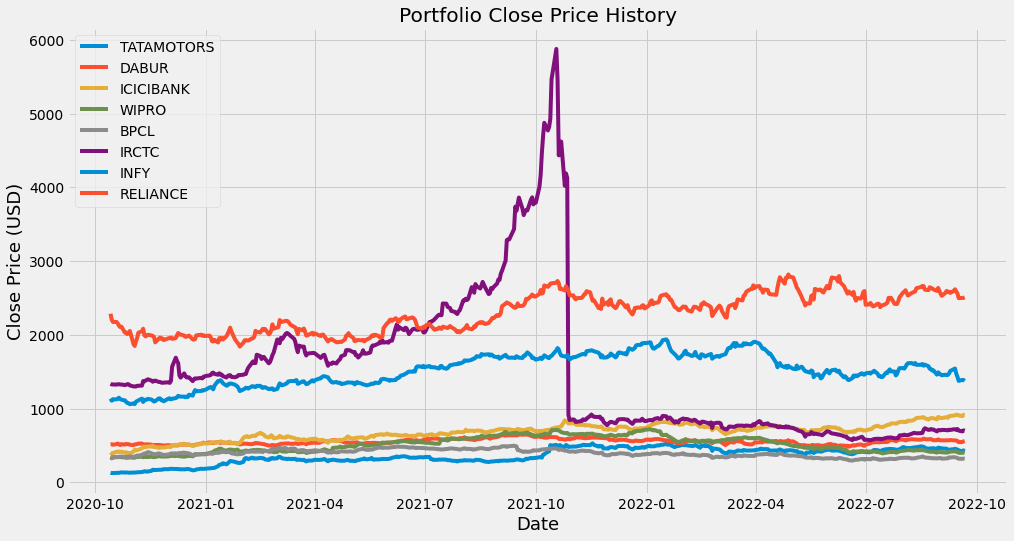

In [20]:
# set plot size
fig = plt.figure(figsize=(15,8))

# iterate through and add plot to figure
for value in data.columns.values:
    plt.plot(data[value], label = value)

# set plot title
plt.title("Portfolio Close Price History")
# set x-axis label
plt.xlabel("Date", fontsize=18)
# set y-axis label
plt.ylabel("Close Price (USD)", fontsize=18)
# plot details
plt.legend(data.columns.values, loc = "upper left")

# save figure to local
plt.savefig('reports/close_prices.png')
# show plot
plt.show(fig)

## Correlation Matrix

Determinig the coefficient of correlation between assets in the portfolio. This indicated the strength of releationship between the stocks in the portfolio, which essentially can be used for effective diversification.

In [21]:
# calculate correlation matrix
corr_matrix = data.corr(method="pearson")
# display dataframe
corr_matrix

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
TATAMOTORS,1.000000,0.321407,0.893932,0.538727,-0.279651,-0.302711,0.764810,0.777685
DABUR,0.321407,1.000000,0.476968,0.705202,0.415061,0.486890,0.621577,0.290562
ICICIBANK,0.893932,0.476968,1.000000,0.488743,-0.237168,-0.190490,0.726772,0.781849
WIPRO,0.538727,0.705202,0.488743,1.000000,0.406596,0.343804,0.876113,0.391451
BPCL,-0.279651,0.415061,-0.237168,0.406596,1.000000,0.722898,0.050493,-0.427908
IRCTC,-0.302711,0.486890,-0.190490,0.343804,0.722898,1.000000,0.037930,-0.184235
INFY,0.764810,0.621577,0.726772,0.876113,0.050493,0.037930,1.000000,0.632222
RELIANCE,0.777685,0.290562,0.781849,0.391451,-0.427908,-0.184235,0.632222,1.000000


### Plotting Correlation Matrix

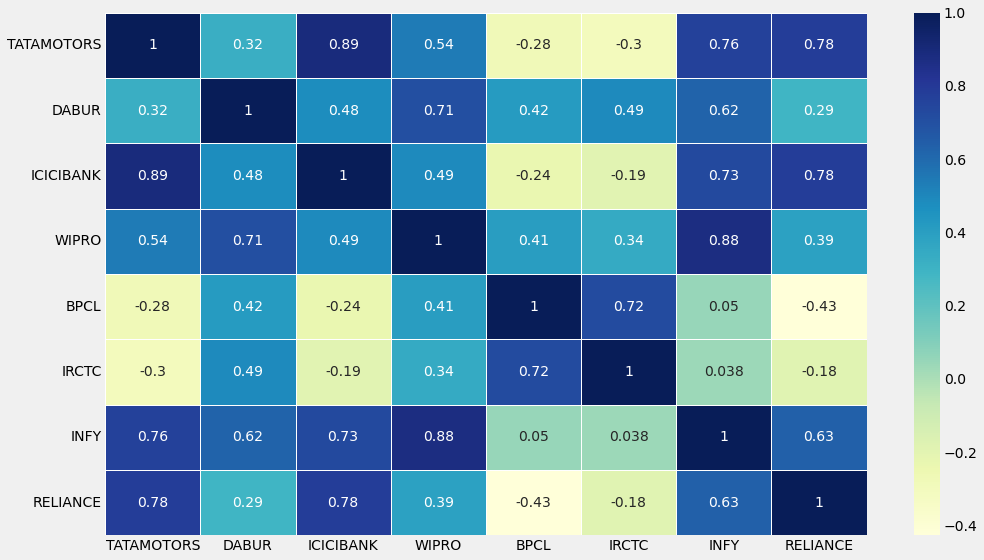

In [22]:
# set figure size
fig = plt.figure(figsize=(15,8))
# plot heatmamp with YlGnBu color map
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            cmap="YlGnBu", annot=True, linewidth=0.5)

# little or no margin
plt.tight_layout()

# save figure
plt.savefig("reports/correlation_matrix.png")
# display figure 
plt.show(fig)

- <b>WIPRO</b> and <b>InfoSys (INFY)</b> are heavily correlated, which is very logical because both commpanies belong to the same industry. 

- **BPCL** and **IRCTC** are negatively correlated. For the sake of diversification, it is necessary to have them in the portfolio. 
    - If <b>BPCL</b> goes down in one particulat direction, there's less chance of <b>IRCTC</b> moving in the same direction.

## Risk & Returns

### Daily Simple Returns

In [23]:
# derive daily simple returns and drop NaN rows
returns_D1 = data.pct_change(1).dropna()
# display dataframe
returns_D1

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2020-10-15,-0.028692,0.001257,-0.038840,-0.025253,-0.018774,-0.006390,-0.025286,-0.035410
2020-10-16,0.006302,-0.011399,0.013043,-0.005708,0.040716,-0.001053,0.017370,-0.013913
2020-10-19,0.003914,0.014852,0.053017,0.010452,0.019709,-0.000904,-0.001419,0.000184
2020-10-20,0.010916,0.016850,-0.005994,0.010344,-0.009520,0.003994,0.010303,-0.009328
2020-10-21,0.004628,-0.023104,0.013748,-0.009517,0.018057,-0.000338,0.009538,-0.014518
...,...,...,...,...,...,...,...,...
2022-09-15,-0.006553,-0.006261,-0.000545,-0.003003,-0.014131,0.016132,-0.028874,-0.009910
2022-09-16,-0.032979,-0.030260,-0.009263,-0.032285,-0.030477,-0.029475,-0.038910,-0.024779
2022-09-19,-0.016301,0.003203,-0.010890,0.000747,-0.001245,-0.015647,0.009622,0.001300


- Daily Simple Returns is essentially the percent change in the prices being calculated daily

### Plotting Daily Simple Returns

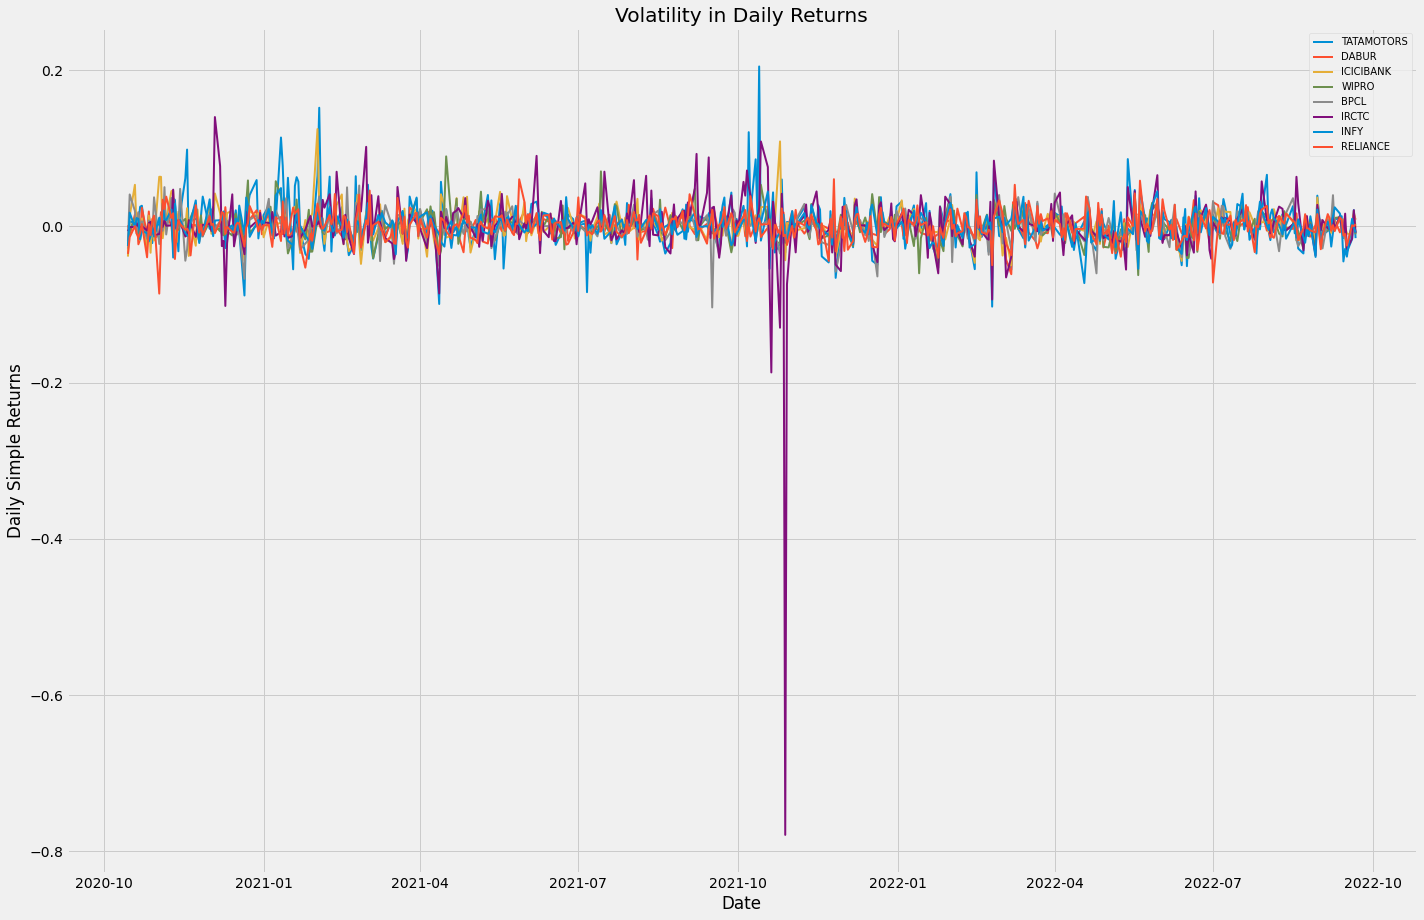

In [24]:
# set figure size
fig=plt.figure(figsize=(20,13))

# add respective plots to figure
for returns in returns_D1.columns.values:
    plt.plot(returns_D1[returns], lw=2, label = returns)

# plot labelling
plt.title("Volatility in Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Simple Returns")
plt.legend(loc = "upper right", fontsize = 10)

# little margin for plot
plt.tight_layout()

# save plot and display
plt.savefig("reports/volatility_daily_returns.png")
plt.show(fig)

- <b>IRCTC</b> is the most volatile stock than any of the individual stocks. 
- <b>ICICBANK</b> seems to be the least volatile stock, with swings much lower than any other stock.

### Average Daily Returns

In [25]:
# derive the average returns
avg_D1 = returns_D1.mean()
avg_D1 * 100

TATAMOTORS    0.287334
DABUR         0.025648
ICICIBANK     0.186027
WIPRO         0.043551
BPCL          0.008566
IRCTC         0.057089
INFY          0.052304
RELIANCE      0.034480
dtype: float64

### Plotting Risk from Daily Returns

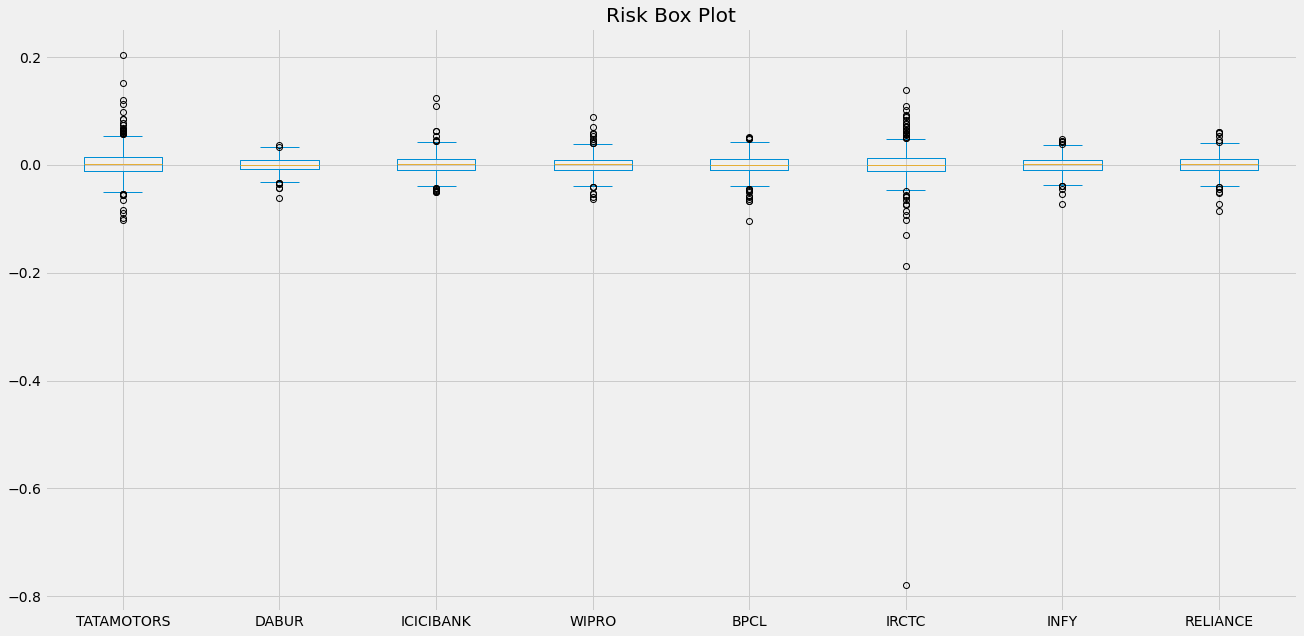

In [26]:
plot = returns_D1.plot(kind = "box", figsize = (20,10), title = "Risk Box Plot")
# plot figure and save to local
fig = plot.get_figure().savefig("reports/daily_risk.png")

- The largest spread comes from <b>IRCTC</b> which makes sense as <b>IRCTC</b> had the highest average return.
- The smallest spread in the above plot is for <b>DABUR</b>. 

### Annualized Standard Deviation (Volatility %, 252 Trading Days)

In [27]:
# derive standard deviation
returns_D1.std() * np.sqrt(252) * 100

TATAMOTORS    45.761781
DABUR         20.643085
ICICIBANK     29.743334
WIPRO         28.170031
BPCL          28.957825
IRCTC         72.037489
INFY          25.041147
RELIANCE      27.669490
dtype: float64

### Return Per Unit Of Risk

In [28]:
avg_D1 / (returns_D1.std() * np.sqrt(252)) * 100

TATAMOTORS    0.627890
DABUR         0.124244
ICICIBANK     0.625442
WIPRO         0.154601
BPCL          0.029581
IRCTC         0.079250
INFY          0.208873
RELIANCE      0.124613
dtype: float64

The higher the ratio, the betteer it is. Hence, **TATAMOTOS** has the best Return-To-Risk ratio, **BPCL** having the lowest. 

After adjusting for a risk-free rate, this ratio called **Sharpe Ratio**, a measure of risk-adjusted return. It describes how much execess return received for the volatility of holding a riskier asset.

### Cummulative Returns

In [29]:
# derive cummulative product of daily returns
cumm_returns = (returns_D1 + 1).cumprod()
cumm_returns

,TATAMOTORS,DABUR,ICICIBANK,WIPRO,BPCL,IRCTC,INFY,RELIANCE
Date,,,,,,,,
2020-10-15,0.971308,1.001257,0.961160,0.974747,0.981226,0.993610,0.974714,0.964590
2020-10-16,0.977429,0.989844,0.973697,0.969182,1.021178,0.992564,0.991645,0.951169
2020-10-19,0.981255,1.004546,1.025320,0.979312,1.041304,0.991667,0.990237,0.951344
2020-10-20,0.991966,1.021472,1.019174,0.989442,1.031391,0.995628,1.000440,0.942470
2020-10-21,0.996557,0.997872,1.033186,0.980026,1.050015,0.995292,1.009982,0.928787
...,...,...,...,...,...,...,...,...
2022-09-15,3.421959,1.089951,2.255654,1.184334,0.995494,0.541347,1.260158,1.120306
2022-09-16,3.309105,1.056969,2.234759,1.146098,0.965155,0.525391,1.211126,1.092546
2022-09-19,3.255164,1.060354,2.210423,1.146954,0.963953,0.517171,1.222779,1.093967


### Plotting Cummulative Returns

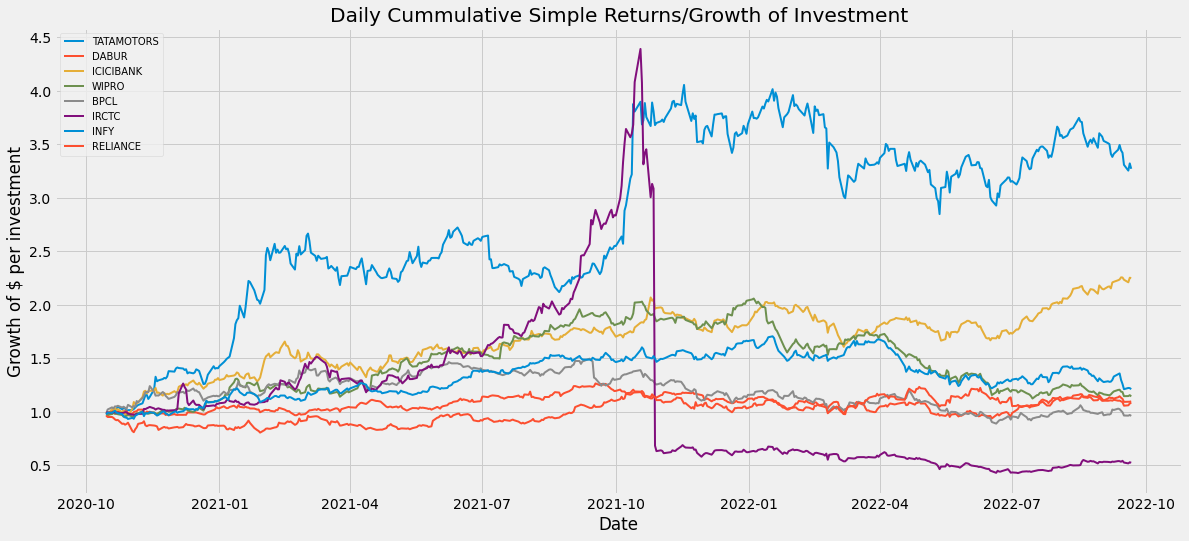

In [30]:
# set figure size
fig = plt.figure(figsize=(18,8))

# add respective plots to figure
for returns in cumm_returns.columns.values:
    plt.plot(cumm_returns[returns], lw=2, label = returns)

# plots labels
plt.legend(loc = "upper left", fontsize=10)
plt.title("Daily Cummulative Simple Returns/Growth of Investment")
plt.xlabel("Date")
plt.ylabel("Growth of $ per investment")

# save figure and display
plt.savefig("reports/cummulative_returns.png")
plt.show(fig)

## Conclusions:

 - **IRCTC** contained some positive outliers affecting analysis, and had the largest spread.

- **Correlation Matrix** indicates the strength of the relationship between the stocks in the portfolio.
    - **WIPRO**/**BPCL** and **INFY**/**RELIANCE** are good investments, considering portfolio diversification. If either of them in one direction, there's a less chance of the other also moving in the same direction.
    - **Diversification** can help reduce the portfolio's risk so that one asset or asset class's performance doesn't affect the entire portfolio.

 - **Sharpe Ratio** indicates how much return is received for the volatility of holding a riskier asset. 
     - **TATAMOTORS** had the best risk-to-return ratio. 
    - **BPCL** permfomed the least across the 2-year period.
- Generally, 
    - **TATAMOTORS** was the best performing stock.